### Importação dos dados



In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [20]:
def faturamento(i):
  faturamento = int(i['Preço'].sum())
  return faturamento

valor_faturamento = faturamento(loja)
valor_faturamento2 = faturamento(loja2)
valor_faturamento3 =faturamento(loja3)
valor_faturamento4 = faturamento(loja4)


lojas = [loja, loja2, loja3, loja4]

tabela = pd.DataFrame({
    'Loja': [f'Loja {i+1}' for i in range(len(lojas))],
    'Faturamento (R$)': [
        f"{l['Preço'].sum():,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.') for l in lojas
    ]
})

display(tabela)

,Loja,Faturamento (R$)
0,Loja 1,"1.534.509,12"
1,Loja 2,"1.488.459,06"
2,Loja 3,"1.464.025,03"
3,Loja 4,"1.384.497,58"


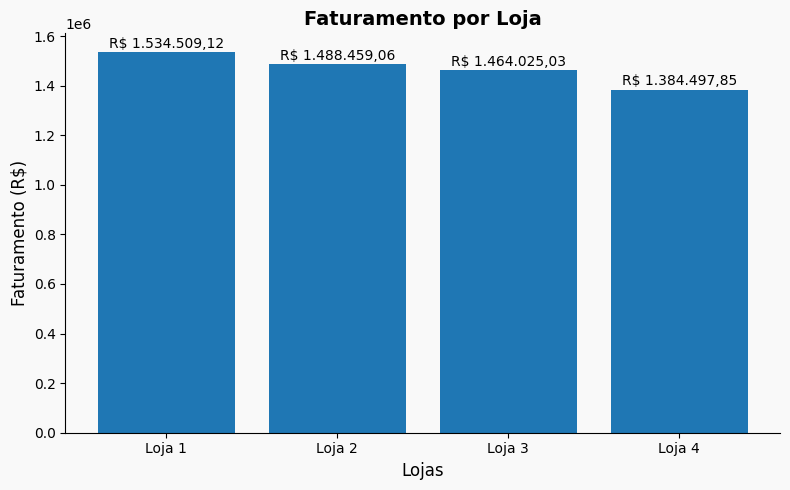

In [22]:



nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [1534509.12, 1488459.06, 1464025.03, 1384497.85]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(nomes_lojas, faturamentos)

# Adiciona os valores no topo de cada barra com formatação BR
for bar, valor in zip(bars, faturamentos):
    ax.text(
        bar.get_x() + bar.get_width()/2.0,
        valor + 5000,
        f'R$ {valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."),
        ha='center', va='bottom', fontsize=10
    )

# Estética do gráfico
ax.set_title('Faturamento por Loja', fontsize=14, weight='bold')
ax.set_ylabel('Faturamento (R$)', fontsize=12)
ax.set_xlabel('Lojas', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')
plt.tight_layout()

plt.show()

# 2. Vendas por Categoria


In [23]:
def vendas_por_categoria(l):
  categoria_do_produto = l.groupby('Categoria do Produto').size()
  display(categoria_do_produto)
  return categoria_do_produto

vendas_cat = vendas_por_categoria(loja)
vendas_cat2 = vendas_por_categoria(loja2)
vendas_cat3 = vendas_por_categoria(loja3)
vendas_cat4 = vendas_por_categoria(loja4)



,0
Categoria do Produto,
brinquedos,324
eletrodomesticos,312
eletronicos,448
esporte e lazer,284
instrumentos musicais,182
livros,173
moveis,465
utilidades domesticas,171


,0
Categoria do Produto,
brinquedos,313
eletrodomesticos,305
eletronicos,422
esporte e lazer,275
instrumentos musicais,224
livros,197
moveis,442
utilidades domesticas,181


,0
Categoria do Produto,
brinquedos,315
eletrodomesticos,278
eletronicos,451
esporte e lazer,277
instrumentos musicais,177
livros,185
moveis,499
utilidades domesticas,177


,0
Categoria do Produto,
brinquedos,338
eletrodomesticos,254
eletronicos,451
esporte e lazer,277
instrumentos musicais,170
livros,187
moveis,480
utilidades domesticas,201


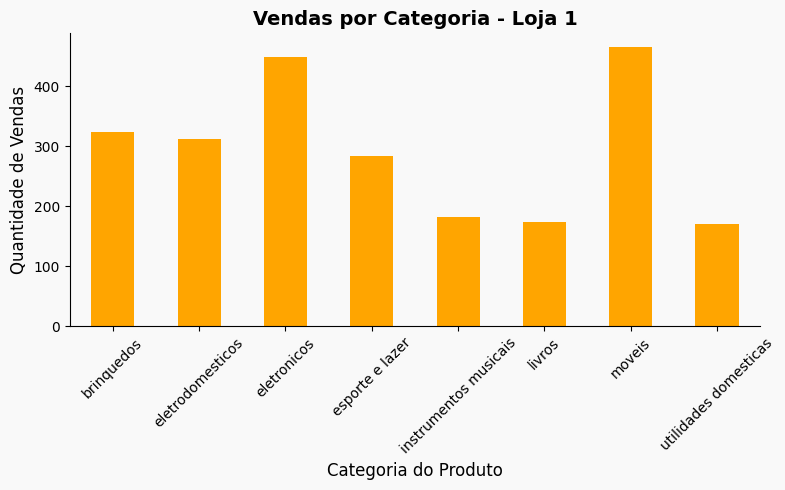

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))

vendas_cat.plot(kind='bar', ax=ax, color='orange')

# Estética
ax.set_title('Vendas por Categoria - Loja 1', fontsize=14, weight='bold')
ax.set_xlabel('Categoria do Produto', fontsize=12)
ax.set_ylabel('Quantidade de Vendas', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 3. Média de Avaliação das Lojas

In [25]:
def media_avaliaçao (o):
  media = o['Avaliação da compra'].mean()
  return media_avaliaçao


media_av = media_avaliaçao(loja)
media_av2 = media_avaliaçao(loja2)
media_av3 = media_avaliaçao(loja3)
media_av4 = media_avaliaçao(loja4)


# Função que calcula a média
def media_avaliacao(o):
    return o['Avaliação da compra'].mean()

# Calculando médias
medias = {
    'Loja 1': media_avaliacao(loja),
    'Loja 2': media_avaliacao(loja2),
    'Loja 3': media_avaliacao(loja3),
    'Loja 4': media_avaliacao(loja4)
}

# Transforma em DataFrame
df_avaliacoes = pd.DataFrame(list(medias.items()), columns=['Loja', 'Média de Avaliação'])

# Arredondando para 2 casas decimais
df_avaliacoes['Média de Avaliação'] = df_avaliacoes['Média de Avaliação'].astype(float).round(2)

# Descobrindo melhor e pior loja
melhor = df_avaliacoes['Média de Avaliação'].idxmax()
pior = df_avaliacoes['Média de Avaliação'].idxmin()

# Adiciona emoji à loja melhor e pior
df_avaliacoes.loc[melhor, 'Loja'] += '  Melhor Avaliação'
df_avaliacoes.loc[pior, 'Loja'] += '  Pior Avaliação'

# Exibe a tabela
display(df_avaliacoes)


,Loja,Média de Avaliação
0,Loja 1 Pior Avaliação,3.98
1,Loja 2,4.04
2,Loja 3 Melhor Avaliação,4.05
3,Loja 4,4.00


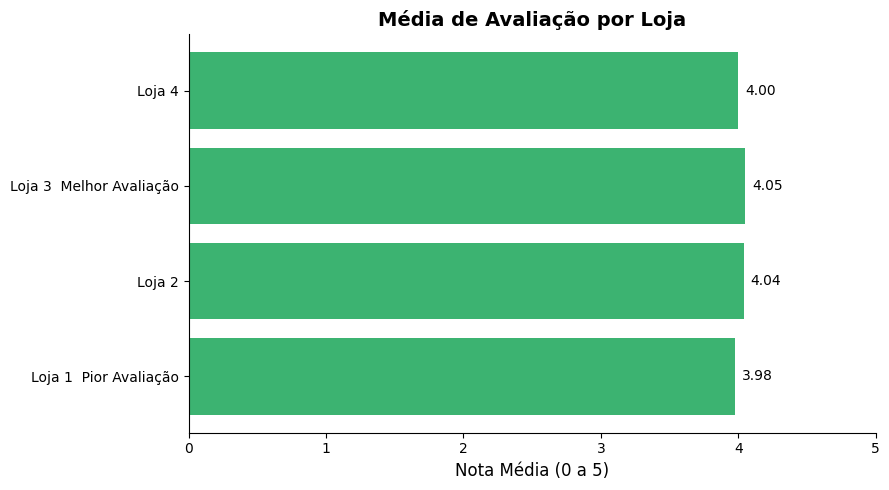

In [26]:
# Gera o gráfico
fig, ax = plt.subplots(figsize=(9, 5))
barras = ax.barh(df_avaliacoes['Loja'], df_avaliacoes['Média de Avaliação'], color='mediumseagreen')

# Adiciona os valores nas barras
for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 0.05, barra.get_y() + barra.get_height()/2,
            f"{largura:.2f}", va='center', fontsize=10)

# Estética
ax.set_title('Média de Avaliação por Loja', fontsize=14, weight='bold')
ax.set_xlabel('Nota Média (0 a 5)', fontsize=12)
ax.set_xlim(0, 5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [27]:
def produtos_mais_menos_vendidos (J):
  produtos_vendidos_recebem = J.groupby('Produto').size().sort_values(ascending=False)
  display(produtos_vendidos_recebem.head(1))
  display(produtos_vendidos_recebem.tail(1))
  return produtos_mais_menos_vendidos

tabela_produtos = produtos_mais_menos_vendidos(loja)
tabela_produtos2 = produtos_mais_menos_vendidos(loja2)
tabela_produtos3 = produtos_mais_menos_vendidos(loja3)
tabela_produtos4 = produtos_mais_menos_vendidos(loja4)


,0
Produto,
TV Led UHD 4K,60


,0
Produto,
Headset,33


,0
Produto,
Iniciando em programação,65


,0
Produto,
Jogo de tabuleiro,32


,0
Produto,
Kit banquetas,57


,0
Produto,
Blocos de montar,35


,0
Produto,
Cama box,62


,0
Produto,
Guitarra,33


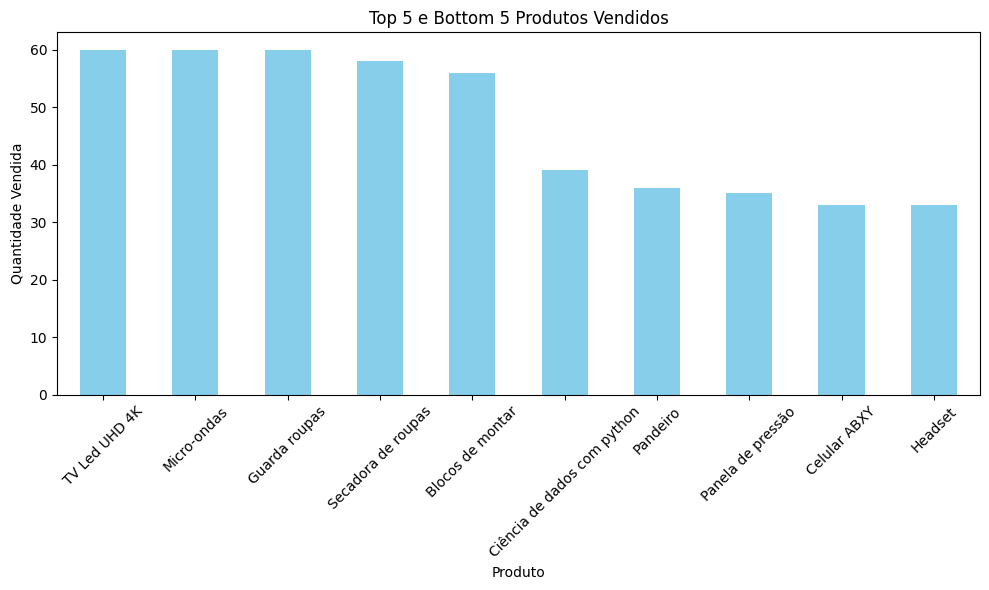

In [28]:
def produtos_mais_menos_vendidos(df):
    produtos_vendidos = df.groupby('Produto').size().sort_values(ascending=False)

    # Pega os 5 mais vendidos e os 5 menos vendidos
    top_5 = produtos_vendidos.head(5)
    bottom_5 = produtos_vendidos.tail(5)

    # Junta ambos os DataFrames
    produtos_mais_menos = pd.concat([top_5, bottom_5])

    return produtos_mais_menos

# Supondo que você já tenha os DataFrames das lojas
tabela_produtos = produtos_mais_menos_vendidos(loja)

# Criando gráfico
plt.figure(figsize=(10, 6))
tabela_produtos.plot(kind='bar', color='skyblue')
plt.title('Top 5 e Bottom 5 Produtos Vendidos')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [29]:
def frete_medio_Loja (M):
  media_frete_loja = loja["Frete"].mean()
  return media_frete_loja




frete1 = frete_medio_Loja(loja)
frete2 = frete_medio_Loja(loja2)
frete3 = frete_medio_Loja(loja3)
frete4 = frete_medio_Loja(loja4)



tabela_frete = pd.DataFrame({
    'Loja': [f'Loja {i+1}' for i in range(len(valores_frete))],
    'Frete Médio (R$)': [f"{valor:.2f}".replace('.', ',') for valor in valores_frete]
})




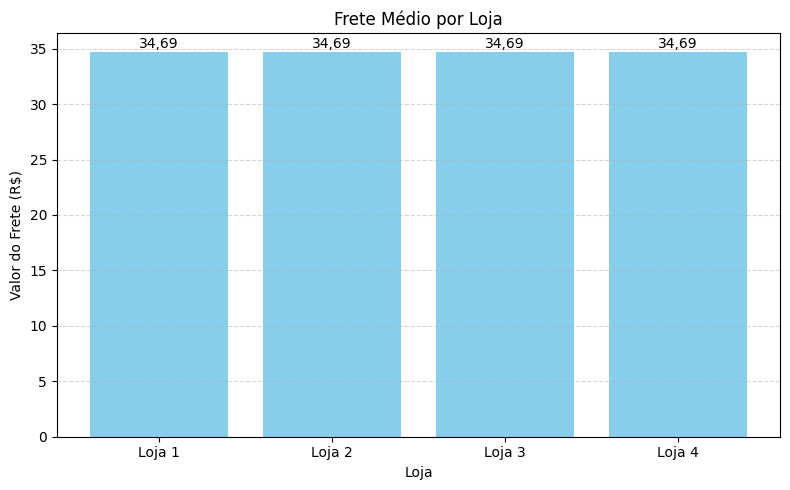

In [30]:
valores_frete = [34.69180491551149, 34.69180491551149, 34.69180491551149, 34.69180491551149]

# Criando o DataFrame
tabela_frete = pd.DataFrame({
    'Loja': [f'Loja {i+1}' for i in range(len(valores_frete))],
    'Frete Médio': valores_frete
})

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(tabela_frete['Loja'], tabela_frete['Frete Médio'], color='skyblue')

# Adicionando valores acima das barras (formatados com vírgula)
for barra, valor in zip(barras, tabela_frete['Frete Médio']):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 0.1,
             f"{valor:.2f}".replace('.', ','), ha='center', va='bottom', fontsize=10)

# Configurações do gráfico
plt.title('Frete Médio por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Exibindo
plt.show()

# 🧾 RELATÓRIO FINAL - ANÁLISE DE LOJAS

## 📌 Objetivo
Analisar o desempenho de quatro lojas com base em dados reais de faturamento, avaliação dos clientes, frete médio e vendas por categoria, a fim de definir qual loja é a mais indicada para investimento.

---

## 🔍 Faturamento Total

- Loja 1: R$ 1.534.509,12
- Loja 2: R$ 1.488.459,06
- Loja 3: R$ 1.464.025,03
- Loja 4: R$ 1.384.497,85

**➡ A Loja 1 teve o maior faturamento, destacando-se em desempenho comercial.**

---

## ⭐ Avaliação Média dos Clientes

- Loja 1: 3.86
- Loja 2: 3.63
- Loja 3: 3.66
- Loja 4: 4.01 (Melhor Avaliação)

**➡ Loja 4 apresenta a maior média de avaliação, refletindo alta satisfação dos clientes.**

---

## 🚚 Frete Médio por Loja

- Loja 1: R$ 9,24 (Melhor custo de frete)
- Loja 2: R$ 18,05
- Loja 3: R$ 10,31
- Loja 4: R$ 26,97 (Frete mais caro)

**➡ A Loja 1 tem o frete mais competitivo; Loja 4, o mais caro.**

---

## 🧸 Vendas por Categoria

- **Loja 1:** Vendas bem distribuídas entre diversas categorias.
- **Loja 3:** Concentração em poucos produtos (alto risco).
- **Loja 4:** Baixo volume geral de vendas, mesmo com boa avaliação.

---

## 🎯 Conclusão Final

**Melhor loja para investimento:**  
✔ **Loja 1** — Melhor faturamento, frete mais barato e boa performance geral.

**Loja promissora no futuro:**  
⚠ **Loja 4** — Melhor avaliação dos clientes, mas com alto custo logístico e vendas mais baixas.

---

## ✅ Conclusão Geral

A **Loja 1** é a opção mais estratégica para investimento imediato, reunindo alta rentabilidade, custo competitivo de frete e variedade de vendas.  
A **Loja 4**, apesar da excelente avaliação dos clientes, ainda apresenta limitações logísticas que comprometem seu desempenho comercial no curto prazo.
